In [1]:
import pysm3
import pysm3.units as u
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
from functions import get_pixel_value_norm
from functions import polarization 
from functions import allpixel_norm
from astropy.coordinates import SkyCoord
import astropy.units as a
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#costants
k = 1.38e-23
h = 6.626e-34
T=20
c=10e8
nu_I_d=545
nu_I_s=0.408
nu_P_d=353
nu_P_s=23
beta_d=1.54
beta_s=-3

In [3]:
frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])
freq= 100
pixels = np.array([1,1000,5000])
Stokes = np.array([0,1,2])
ref_d = np.array([nu_I_d,nu_P_d,nu_P_d])
ref_s = np.array([nu_I_s,nu_P_s,nu_P_s])

In [4]:
Sky_d0=pysm3.Sky(nside=64, preset_strings=["d0"])
Sky_s0=pysm3.Sky(nside=64, preset_strings=["s0"])

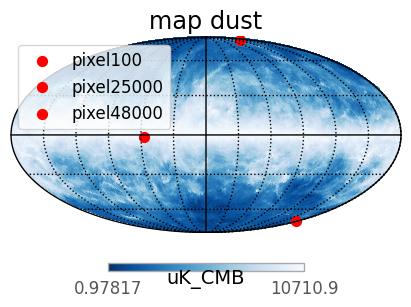

In [5]:
map_100GHz = Sky_d0.get_emission(100 * u.GHz)
map_100GHz = map_100GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz))

pix1 = 100
pix2 = 25000
pix3 = 48000
nside = 64

# Calcolo delle coordinate celesti del pixel
theta1, phi1 = hp.pix2ang(nside, pix1)
theta2, phi2 = hp.pix2ang(nside, pix2)
theta3, phi3 = hp.pix2ang(nside, pix3)

# Conversione delle coordinate in gradi
ra1 = np.rad2deg(phi1)
dec1 = np.rad2deg(0.5 * np.pi - theta1)

ra2 = np.rad2deg(phi2)
dec2 = np.rad2deg(0.5 * np.pi - theta2)

ra3 = np.rad2deg(phi3)
dec3 = np.rad2deg(0.5 * np.pi - theta3)

# Creazione della mappa HEALPix
hp.mollview(map_100GHz[0], title='map dust', norm='hist', unit=map_100GHz.unit, cmap='Blues_r', sub=(1,2,1) )
hp.projscatter(ra1, dec1, lonlat=True, s=50, marker='o', color='r', label='pixel100')
hp.projscatter(ra2, dec2, lonlat=True, s=50, marker='o', color='r', label='pixel25000')
hp.projscatter(ra3, dec3, lonlat=True, s=50, marker='o', color='r', label='pixel48000')
# Stampa della mappa
hp.graticule()
plt.legend()


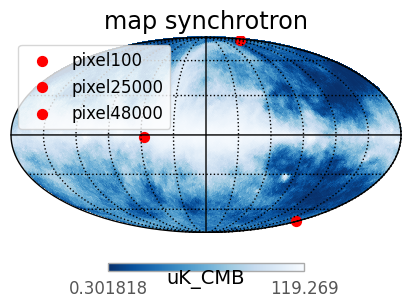

In [6]:
map_100GHz = Sky_s0.get_emission(100 * u.GHz)
map_100GHz = map_100GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz))

pix1 = 100
pix2 = 25000
pix3 = 48000
nside = 64

# Calcolo delle coordinate celesti del pixel
theta1, phi1 = hp.pix2ang(nside, pix1)
theta2, phi2 = hp.pix2ang(nside, pix2)
theta3, phi3 = hp.pix2ang(nside, pix3)

# Conversione delle coordinate in gradi
ra1 = np.rad2deg(phi1)
dec1 = np.rad2deg(0.5 * np.pi - theta1)

ra2 = np.rad2deg(phi2)
dec2 = np.rad2deg(0.5 * np.pi - theta2)

ra3 = np.rad2deg(phi3)
dec3 = np.rad2deg(0.5 * np.pi - theta3)

# Creazione della mappa HEALPix
hp.mollview(map_100GHz[0], title='map synchrotron', norm='hist', unit=map_100GHz.unit, cmap='Blues_r', sub=(1,2,1) )
hp.projscatter(ra1, dec1, lonlat=True, s=50, marker='o', color='r', label = 'pixel100')
hp.projscatter(ra2, dec2, lonlat=True, s=50, marker='o', color='r', label = 'pixel25000')
hp.projscatter(ra3, dec3, lonlat=True, s=50, marker='o', color='r', label = 'pixel48000')
# Stampa della mappa
hp.graticule()
plt.legend()

In [7]:
d0=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d0))
s0=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s0))

In [8]:
#Root mean square
map_D_I = Sky_d0.get_emission(nu_I_d * u.GHz)[0] 
RMS_D_I = np.sqrt(np.mean(map_D_I.value**2))
map_D_Q = Sky_d0.get_emission(nu_P_d * u.GHz)[1] 
RMS_D_Q = np.sqrt(np.mean(map_D_Q.value**2))
map_D_U = Sky_d0.get_emission(nu_P_d * u.GHz)[2] 
RMS_D_U = np.sqrt(np.mean(map_D_U.value**2))

map_S_I = Sky_s0.get_emission(nu_I_s * u.GHz)[0] 
RMS_S_I = np.sqrt(np.mean(map_S_I.value**2))
map_S_Q = Sky_s0.get_emission(nu_P_s * u.GHz)[1]
RMS_S_Q = np.sqrt(np.mean(map_S_Q.value**2))
map_S_U = Sky_s0.get_emission(nu_P_s * u.GHz)[2]
RMS_S_U = np.sqrt(np.mean(map_S_U.value**2))

In [9]:
#values for all the pixels of the map
allpixel_D,err_D=np.array(allpixel_norm(frequencies,St=Stokes[0],sky=Sky_d0,value=RMS_D_I))
allpixel_S,err_S=np.array(allpixel_norm(frequencies,St=Stokes[0],sky=Sky_s0,value=RMS_S_I))

allpixel_Q_D,err_Q_D=np.array(allpixel_norm (frequencies,St=Stokes[1],sky=Sky_d0,value=RMS_D_Q))
allpixel_Q_S,err_Q_S=np.array(allpixel_norm (frequencies,St=Stokes[1],sky=Sky_s0,value=RMS_S_Q))

allpixel_U_D,err_U_D=np.array(allpixel_norm (frequencies,St=Stokes[2],sky=Sky_d0,value=RMS_D_U))
allpixel_U_S,err_U_S=np.array(allpixel_norm (frequencies,St=Stokes[2],sky=Sky_s0,value=RMS_S_U))


In [10]:
#reference function for the model d0 and s0
modified_BB_I_D=(np.exp((h*nu_I_d*10**9)/(k*T))-1)/(np.exp((h*frequencies*10**9)/(k*T))-1)*(frequencies/nu_I_d)**(1+beta_d)
power_law_I_S=((frequencies/nu_I_s)**(beta_s))
modified_BB_Q_D=(np.exp((h*nu_P_d*10**9)/(k*T))-1)/(np.exp((h*frequencies*10**9)/(k*T))-1)*(frequencies/nu_P_d)**(1+beta_d)
power_law_Q_S=((frequencies/nu_P_s)**(beta_s))


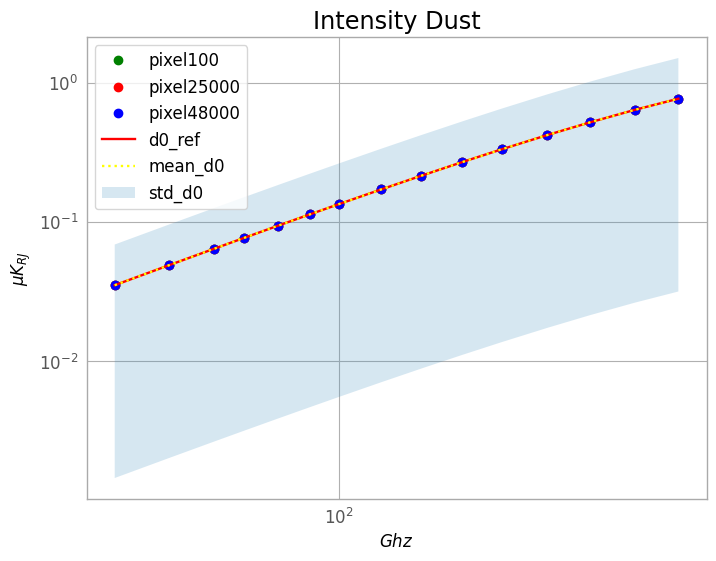

In [11]:

plt.plot(frequencies,d0[:,0,100],'o',color='green',label="pixel100")
plt.plot(frequencies,d0[:,0,25000],'o',color='red',label="pixel25000")
plt.plot(frequencies,d0[:,0,48000],'o',color='blue',label="pixel48000")

plt.plot(frequencies,modified_BB_I_D,'-',color='red',label="d0_ref")
plt.plot(frequencies,allpixel_D,':',color='yellow',label="mean_d0")
plt.fill_between(frequencies,allpixel_D+err_D, allpixel_D-err_D, alpha=0.2, label="std_d0")



plt.title("Intensity Dust")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

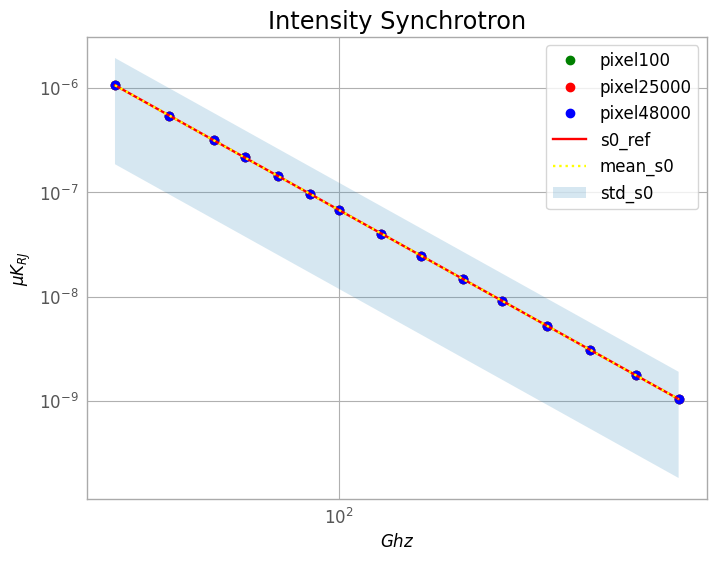

In [12]:

plt.plot(frequencies,s0[:,0,0],'o',color='green',label="pixel100")
plt.plot(frequencies,s0[:,0,50],'o',color='red',label="pixel25000")
plt.plot(frequencies,s0[:,0,100],'o',color='blue',label="pixel48000")

plt.plot(frequencies,power_law_I_S,'-',color='red',label="s0_ref")
plt.plot(frequencies,allpixel_S,':',color='yellow',label="mean_s0")
plt.fill_between(frequencies,allpixel_S+err_S, allpixel_S-err_S, alpha=0.2, label="std_s0")


plt.title("Intensity Synchrotron")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

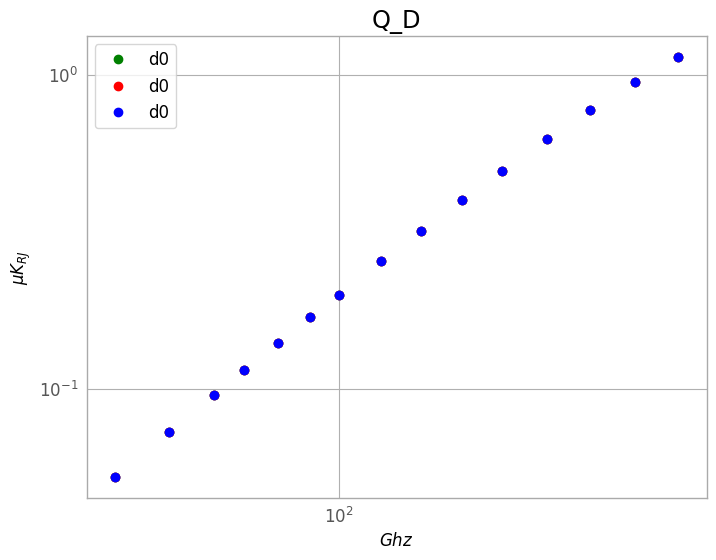

In [13]:

plt.plot(frequencies,d0[:,1,0],'o',color='green',label="d0")
plt.plot(frequencies,d0[:,1,50],'o',color='red',label="d0")
plt.plot(frequencies,d0[:,1,100],'o',color='blue',label="d0")

plt.title("Q_D")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

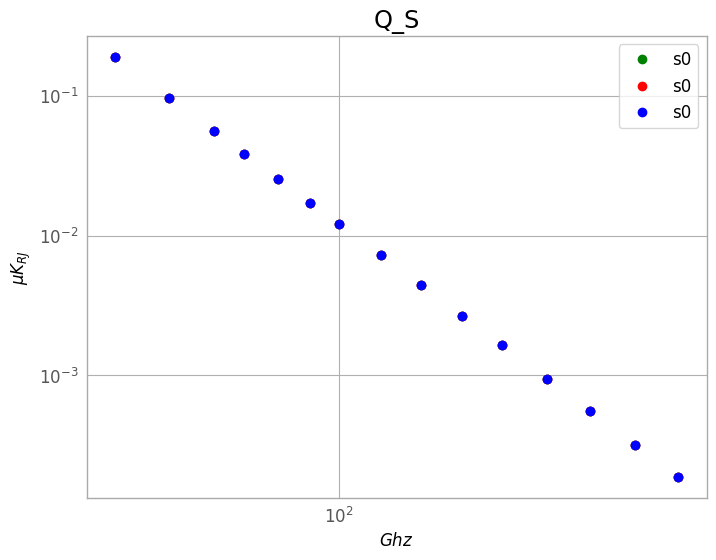

In [14]:
plt.plot(frequencies,s0[:,1,0],'o',color='green',label="s0")
plt.plot(frequencies,s0[:,1,50],'o',color='red',label="s0")
plt.plot(frequencies,s0[:,1,100],'o',color='blue',label="s0")

plt.title("Q_S")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

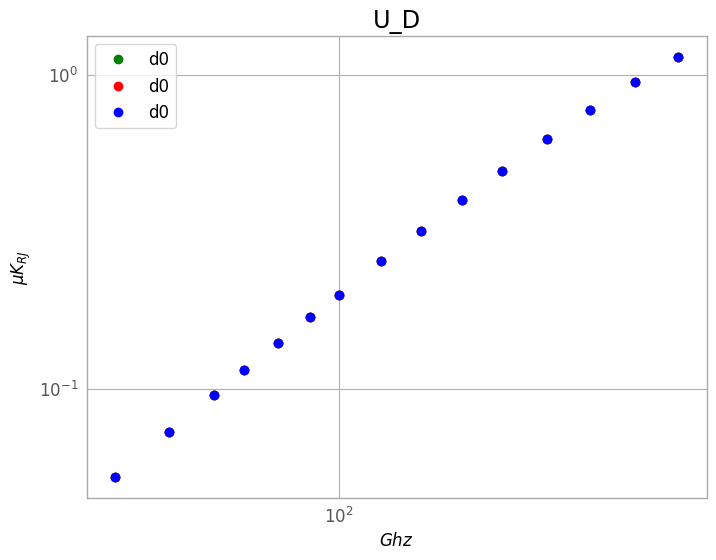

In [15]:
plt.plot(frequencies,d0[:,2,0],'o',color='green',label="d0")
plt.plot(frequencies,d0[:,2,50],'o',color='red',label="d0")
plt.plot(frequencies,d0[:,2,100],'o',color='blue',label="d0")


plt.title("U_D")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

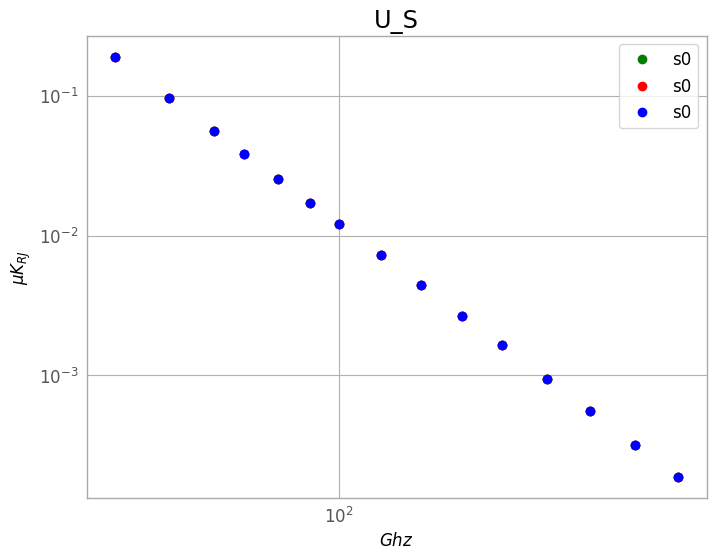

In [16]:
plt.plot(frequencies,s0[:,2,0],'o',color='green',label="s0")
plt.plot(frequencies,s0[:,2,50],'o',color='red',label="s0")
plt.plot(frequencies,s0[:,2,100],'o',color='blue',label="s0")

plt.title("U_S")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

In [17]:

modified_BB_P_D=polarization(modified_BB_Q_D,modified_BB_Q_D)
allpixel_P_D=np.array(polarization(allpixel_Q_D,allpixel_U_D))
err_P_D=np.array(polarization(err_Q_D,err_U_D))


power_law_P_S= polarization(power_law_Q_S,power_law_Q_S)
allpixel_P_S=np.array(polarization(allpixel_Q_S,allpixel_U_S))
err_P_S=np.array(polarization(err_Q_S,err_U_S))

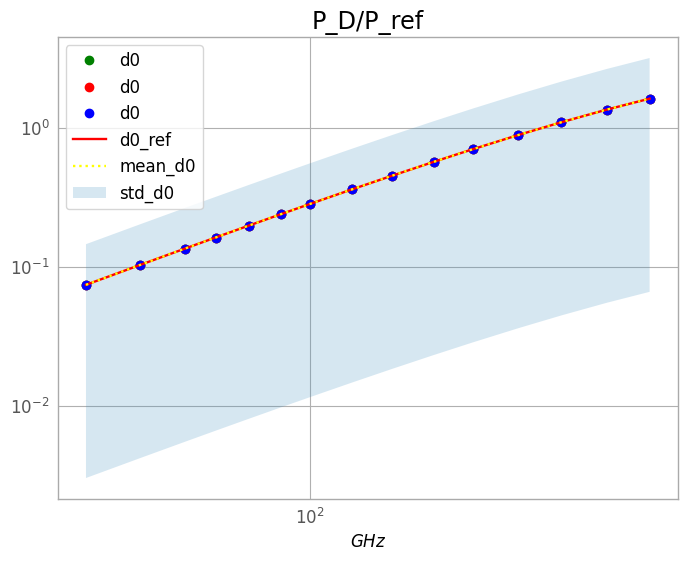

In [18]:

plt.plot(frequencies,polarization(d0[:,1,0],d0[:,2,0]),'o',color='green',label="d0")
plt.plot(frequencies,polarization(d0[:,1,50],d0[:,2,50]),'o',color='red',label="d0")
plt.plot(frequencies,polarization(d0[:,1,100],d0[:,2,100]),'o',color='blue',label="d0")

plt.plot(frequencies,modified_BB_P_D,'-',color='red',label="d0_ref")
plt.plot(frequencies,allpixel_P_D,':',color='yellow',label="mean_d0")
plt.fill_between(frequencies, allpixel_P_D+err_P_D, allpixel_P_D-err_P_D, alpha=0.2, label="std_d0")



plt.title("P_D/P_ref")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$GHz$')
plt.legend()






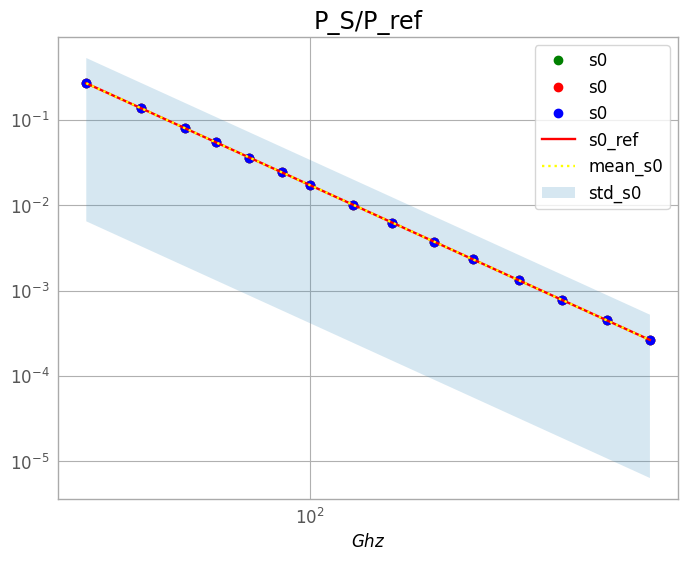

In [19]:

plt.plot(frequencies,polarization(s0[:,1,0],s0[:,2,0]),'o',color='green',label="s0")
plt.plot(frequencies,polarization(s0[:,1,50],s0[:,2,50]),'o',color='red',label="s0")
plt.plot(frequencies,polarization(s0[:,1,100],s0[:,2,100]),'o',color='blue',label="s0")

plt.plot(frequencies,power_law_P_S,'-',color='red',label="s0_ref")
plt.plot(frequencies,allpixel_P_S,':',color='yellow',label="mean_s0")
plt.fill_between(frequencies, allpixel_P_S+err_P_S, allpixel_P_S-err_P_S, alpha=0.2, label="std_s0")



plt.title("P_S/P_ref")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.legend()